# Corporación Favorita Grocery Sales Forecasting

# Abstract

In this assignment, we are trying to forecasts product sales based on the items, stores, transaction and other dependent variables like holidays and oil prices.

This is a Kaggle Competition called "Corporación Favorita Grocery Sales Forecasting" where the task is to predict stocking of products to better ensure grocery stores please customers by having just enough of the right products at the right time.

For this particular problem, we have analyzed the data as a supervised learning problem. In order to forecasts the sales we  Gradient Boosting algorithms and XgBoost. Further to optimize the results we have used multilayer perception LightGBM ( gradient boosting framework that uses tree based learning algorithms).

The data comes in the shape of multiple files. First, the training data (train.csv) essentially contains the sales by date, store, and item. The test data (test.csv) contains the same features without the sales information, which we are tasked to predict. The train vs test split is based on the date. In addition, some test items are not included in the train data.

# Data Sources

There are 5 additional data files that provide the following information:

-- stores.csv : Details about the stores, such as location and type.

-- items.csv: Item metadata, such as class and whether they are perishable. Note, that perishable items have a higher scoring weight than others.

-- transactions.csv: Count of sales transactions for the training data

-- oil.csv: Daily oil price. This is relevant, because “Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.” (source)

-- holidays_events.csv: Holidays in Ecuador. Some holidays can be transferred to another day (possibly from weekend to weekday).

**Have not included the datasources on github and blackboard beacuse of the size constraint

# Imported the libraries

In [70]:

#Loading all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder,minmax_scale,PolynomialFeatures,StandardScaler,Normalizer
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
%matplotlib inline
import datetime
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import lightgbm as lgb
print("Loaded Libraries")

Loaded Libraries


# Loading data

In [3]:
Stores = pd.read_csv('Stores.csv')
print("Loaded Stores Data")
Stores.head()

Loaded Stores Data


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [4]:
Stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [5]:
items = pd.read_csv('items.csv')
print("Loaded items Data")
items.head()

Loaded items Data


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [6]:
items.isnull().sum()

item_nbr      0
family        0
class         0
perishable    0
dtype: int64

In [7]:
transaction = pd.read_csv('transactions.csv')
print("Loaded transaction data")
transaction.head()

Loaded transaction data


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
transaction.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [9]:
holidays = pd.read_csv('holidays_events.csv')
print("Loaded Holidays data")
holidays.head()

Loaded Holidays data


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [10]:
holidays.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [11]:
oil = pd.read_csv('oil.csv')
print("Loaded oil data")
oil.head()

Loaded oil data


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [12]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [13]:
#Check how many NA
print(oil.isnull().sum(), '\n')

#Type
print('Type : ', '\n', oil.dtypes)

#Print the 3 first line
oil.head(5)

date           0
dcoilwtico    43
dtype: int64 

Type :  
 date           object
dcoilwtico    float64
dtype: object


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [15]:
#Loading the data
dtypes = {'store_nbr': np.dtype('int64'),
          'item_nbr': np.dtype('int64'),
          'unit_sales': np.dtype('float64'),
          'onpromotion': np.dtype('O')}

Sales = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')




    
stores = pd.read_csv('stores.csv')
items = pd.read_csv('items.csv')
trans = pd.read_csv('transactions.csv')
#oil = pd.read_csv('../input/oil.csv') #we upload this database later
holidays = pd.read_csv('holidays_events.csv')
print('Success')

C:\Users\owner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Success


In [16]:

#sampling the data, since the data is too huge to carry put any operations
date_mask = (Sales['date'] >= '2017-07-15') & (Sales['date'] <= '2017-08-15')

Salesdf = Sales[date_mask]


#Print the size
len(Salesdf)


3359566

# Anomaly Detection

In [17]:
#Load the data
oil = pd.read_csv('oil.csv')

#add missing date
min_oil_date = min(Salesdf.date)
max_oil_date = max(Salesdf.date)

calendar = []

d1 = datetime.datetime.strptime(min_oil_date, '%Y-%m-%d')  # start date
d2 = datetime.datetime.strptime(max_oil_date, '%Y-%m-%d')  # end date

delta = d2 - d1         # timedelta

for i in range(delta.days + 1):
    calendar.append(datetime.date.strftime(d1 + timedelta(days=i), '%Y-%m-%d'))

calendar = pd.DataFrame({'date':calendar})

oil = calendar.merge(oil, left_on='date', right_on='date', how='left')

In [18]:
oil.head()

,date,dcoilwtico
0,2017-07-15,NaN
1,2017-07-16,NaN
2,2017-07-17,46.02
3,2017-07-18,46.40
4,2017-07-19,47.10


# Data Cleaning

In [19]:

#Check how many NA
print(oil.isnull().sum(), '\n')

#Type
print('Type : ', '\n', oil.dtypes)

#Print the 3 first line
oil.head(5)

date           0
dcoilwtico    10
dtype: int64 

Type :  
 date           object
dcoilwtico    float64
dtype: object


,date,dcoilwtico
0,2017-07-15,NaN
1,2017-07-16,NaN
2,2017-07-17,46.02
3,2017-07-18,46.40
4,2017-07-19,47.10


# Analysing impact of oil on sales of products

In [20]:
#Check index to apply the formula
na_index_oil = oil[oil['dcoilwtico'].isnull() == True].index.values

#Define the index to use to apply the formala
na_index_oil_plus = na_index_oil.copy()
na_index_oil_minus = np.maximum(0, na_index_oil-1)

for i in range(len(na_index_oil)):
    k = 1
    while (na_index_oil[min(i+k,len(na_index_oil)-1)] == na_index_oil[i]+k):
        k += 1
    na_index_oil_plus[i] = min(len(oil)-1, na_index_oil_plus[i] + k )

#Apply the formula
for i in range(len(na_index_oil)):
    if (na_index_oil[i] == 0):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_plus[i], 'dcoilwtico']
    elif (na_index_oil[i] == len(oil)):
        oil.loc[na_index_oil[i], 'dcoilwtico'] = oil.loc[na_index_oil_minus[i], 'dcoilwtico']
    else:
        oil.loc[na_index_oil[i], 'dcoilwtico'] = (oil.loc[na_index_oil_plus[i], 'dcoilwtico'] + oil.loc[na_index_oil_minus[i], 'dcoilwtico'])/ 2

In [21]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

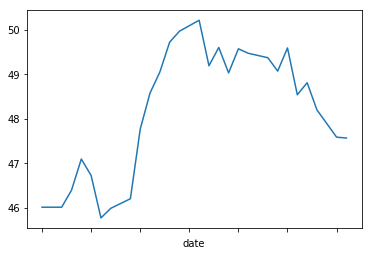

In [22]:
#Plot the oil values
oil_plot = oil['dcoilwtico'].copy()
oil_plot.index = oil['date'].copy()
oil_plot.plot()
plt.show()

# By the end of the analysis it is evident that the sale of oil as an important commodity has a significant impact on the unit sales of other products.

# Merging Datasets

In [23]:
#Merge train
Salesdf = Salesdf.drop('id', axis = 1)
Salesdf = Salesdf.merge(stores, left_on='store_nbr', right_on='store_nbr', how='left')
Salesdf = Salesdf.merge(items, left_on='item_nbr', right_on='item_nbr', how='left')
Salesdf = Salesdf.merge(holidays, left_on='date', right_on='date', how='left')
Salesdf = Salesdf.merge(oil, left_on='date', right_on='date', how='left')
Salesdf = Salesdf.drop(['description', 'state', 'locale_name', 'class'], axis = 1)

In [24]:
Salesdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359566 entries, 0 to 3359565
Data columns (total 14 columns):
date           object
store_nbr      int64
item_nbr       int64
unit_sales     float64
onpromotion    object
city           object
type_x         object
cluster        int64
family         object
perishable     int64
type_y         object
locale         object
transferred    object
dcoilwtico     float64
dtypes: float64(2), int64(4), object(8)
memory usage: 384.5+ MB


In [25]:
Salesdf.isnull().sum().sort_values(ascending=False)

transferred    2626056
locale         2626056
type_y         2626056
dcoilwtico           0
perishable           0
family               0
cluster              0
type_x               0
city                 0
onpromotion          0
unit_sales           0
item_nbr             0
store_nbr            0
date                 0
dtype: int64

In [26]:
#Shape
print('Shape : ', Salesdf.shape, '\n')

#Type
print('Type : ', '\n', Salesdf.dtypes)

#Summary
Salesdf.describe()

Shape :  (3359566, 14) 

Type :  
 date            object
store_nbr        int64
item_nbr         int64
unit_sales     float64
onpromotion     object
city            object
type_x          object
cluster          int64
family          object
perishable       int64
type_y          object
locale          object
transferred     object
dcoilwtico     float64
dtype: object


,store_nbr,item_nbr,unit_sales,cluster,perishable,dcoilwtico
count,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06,3.359566e+06
mean,2.831059e+01,1.171591e+06,8.053185e+00,8.703191e+00,2.580432e-01,4.814635e+01
std,1.630974e+01,5.871905e+05,2.371664e+01,4.566465e+00,4.375579e-01,1.468388e+00
min,1.000000e+00,9.699500e+04,-2.410000e+02,1.000000e+00,0.000000e+00,4.578000e+01
25%,1.300000e+01,6.925310e+05,2.000000e+00,5.000000e+00,0.000000e+00,4.640000e+01
50%,2.900000e+01,1.212452e+06,4.000000e+00,9.000000e+00,0.000000e+00,4.858000e+01
75%,4.400000e+01,1.583407e+06,8.000000e+00,1.300000e+01,1.000000e+00,4.947000e+01
max,5.400000e+01,2.127114e+06,5.901000e+03,1.700000e+01,1.000000e+00,5.021000e+01


In [27]:
#5 random lines
Salesdf.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
1092574,2017-07-25,20,153239,7.0,False,Quito,B,6,BREAD/BAKERY,1,Additional,Local,False,47.770
2606566,2017-08-08,40,1346626,5.0,False,Machala,C,3,CLEANING,0,NaN,NaN,NaN,49.070
1373496,2017-07-28,8,1457245,2.0,False,Quito,D,8,HOME CARE,0,NaN,NaN,NaN,49.720
645034,2017-07-21,7,1457185,7.0,True,Quito,D,8,HOME CARE,0,NaN,NaN,NaN,45.780
2927448,2017-08-11,48,839364,13.0,False,Quito,A,14,BEVERAGES,0,Transfer,National,False,48.810
3065938,2017-08-13,9,586911,3.0,False,Quito,B,6,PERSONAL CARE,0,NaN,NaN,NaN,47.895
1954157,2017-08-02,30,1085486,1.0,False,Guayaquil,C,3,AUTOMOTIVE,0,NaN,NaN,NaN,49.600
2188390,2017-08-04,45,679602,6.0,False,Quito,A,11,BREAD/BAKERY,1,NaN,NaN,NaN,49.570
155934,2017-07-16,24,229368,6.0,False,Guayaquil,D,1,GROCERY I,0,NaN,NaN,NaN,46.020
1205792,2017-07-26,27,1166475,3.0,False,Daule,D,1,BEVERAGES,0,NaN,NaN,NaN,48.580


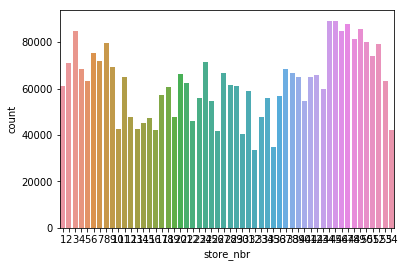

In [28]:
sns.countplot(x='store_nbr', data=Salesdf);

# This plot shows the count of stores types.

In [29]:
Salesdf.item_nbr.unique

<bound method Series.unique of 0            99197
1           103520
2           105574
3           105575
4           105737
5           105857
6           106716
7           108696
8           108698
9           108797
10          108862
11          108952
12          111223
13          111397
14          112830
15          114778
16          114790
17          114799
18          114800
19          115267
20          115611
21          115720
22          115850
23          115892
24          115893
25          116017
26          116018
27          119024
28          119026
29          119141
            ...   
3359536    2056557
3359537    2057442
3359538    2058758
3359539    2059277
3359540    2059342
3359541    2059799
3359542    2060787
3359543    2060793
3359544    2060910
3359545    2061025
3359546    2061033
3359547    2061404
3359548    2062477
3359549    2067056
3359550    2081056
3359551    2081064
3359552    2081095
3359553    2081161
3359554    2084278
3359555    2084557


In [30]:
x=itemfreq(Salesdf.item_nbr)
x=x[x[:,1].argsort()[::-1]]
x

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  """Entry point for launching an IPython kernel.


array([[2042947,    1726],
       [ 502331,    1724],
       [ 314384,    1723],
       ...,
       [1981370,       1],
       [1418842,       1],
       [1066900,       1]], dtype=int64)

In [31]:
x[:,0][0:10]

array([2042947,  502331,  314384,  323013,  364606,  222879, 2042941,
        414750, 1162382, 1418845], dtype=int64)

In [32]:
s=Salesdf.item_nbr.as_matrix()
s

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([  99197,  103520,  105574, ..., 2110456, 2113914, 2116416],
      dtype=int64)

In [33]:
t=s.reshape(s.shape[0],1)
t

array([[  99197],
       [ 103520],
       [ 105574],
       ...,
       [2110456],
       [2113914],
       [2116416]], dtype=int64)

In [34]:
t1=np.where(t==x)
t1

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

# fetching the N most purchased products

In [35]:
#Fetching the N most purchased products#
def N_most_labels(data, variable , N , all='TRUE'):
    labels_freq_pd = itemfreq(data[variable])
    labels_freq_pd = labels_freq_pd[labels_freq_pd[:, 1].argsort()[::-1]] #[::-1] ==> to sort in descending order
    
    if all == 'FALSE':
        main_labels = labels_freq_pd[:,0][0:N]
    else: 
        main_labels = labels_freq_pd[:,0][:]
        
    labels_raw_np = data[variable].as_matrix() #transform in numpy
    labels_raw_np = labels_raw_np.reshape(labels_raw_np.shape[0],1)

    labels_filtered_index = np.where(labels_raw_np == main_labels)
    
    return labels_freq_pd, labels_filtered_index

label_freq, labels_filtered_index = N_most_labels(data = Salesdf, variable = "item_nbr", N = 20, all='FALSE')
print("labels_filtered_index[0].shape = ", labels_filtered_index[0].shape)

Salesdf_filtered = Salesdf.loc[labels_filtered_index[0],:]

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


labels_filtered_index[0].shape =  (34207,)


In [36]:
label_freq[0:10]

array([[2042947,    1726],
       [ 502331,    1724],
       [ 314384,    1723],
       [ 323013,    1722],
       [ 364606,    1722],
       [ 222879,    1720],
       [2042941,    1719],
       [ 414750,    1716],
       [1162382,    1715],
       [1418845,    1715]], dtype=int64)

In [37]:
Salesdf_filtered.sample(3)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
2213930,2017-08-05,2,265559,16.0,False,Quito,D,13,GROCERY I,0,Holiday,Local,False,49.47
203633,2017-07-16,47,364606,124.0,False,Quito,A,14,GROCERY I,0,NaN,NaN,NaN,46.02
2054817,2017-08-03,28,502331,22.0,False,Guayaquil,E,10,BREAD/BAKERY,1,NaN,NaN,NaN,49.03


In [38]:
#Fill in cells if there is no holiday by the value : "no_holyday"
na_index_Salesdf = Salesdf_filtered[Salesdf_filtered['type_y'].isnull() == True].index.values
print("Size of na_index_Salesdf : ", len(na_index_Salesdf), '\n')

Salesdf_filtered.loc[Salesdf_filtered['type_y'].isnull(), 'type_y'] = "no_holyday"
Salesdf_filtered.loc[Salesdf_filtered['locale'].isnull(), 'locale'] = "no_locale"
Salesdf_filtered.loc[Salesdf_filtered['transferred'].isnull(), 'transferred'] = "no_holyday"
    
#check is there is NA
Salesdf_filtered.isnull().sum()

Size of na_index_Salesdf :  26729 



date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
city           0
type_x         0
cluster        0
family         0
perishable     0
type_y         0
locale         0
transferred    0
dcoilwtico     0
dtype: int64

In [53]:
def get_month_year(df):
    df['month'] = df.date.apply(lambda x: x.split('-')[1])
    df['year'] = df.date.apply(lambda x: x.split('-')[0])
    
    return df

get_month_year(Salesdf_filtered);

AttributeError: 'DataFrame' object has no attribute 'date'

In [52]:
Salesdf_filtered['date'] = pd.to_datetime(Salesdf_filtered['date'])
Salesdf_filtered['day'] = Salesdf_filtered['date'].dt.weekday_name
Salesdf_filtered = Salesdf_filtered.drop('date', axis=1)

In [39]:
Salesdf_filtered.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
744600,2017-07-22,6,1036689,26.0,False,Quito,D,13,GROCERY I,0,no_holyday,no_locale,no_holyday,45.995
674235,2017-07-21,25,222879,2.0,False,Salinas,D,1,GROCERY I,0,no_holyday,no_locale,no_holyday,45.780
190313,2017-07-16,41,2081064,14.0,False,Machala,D,4,PREPARED FOODS,1,no_holyday,no_locale,no_holyday,46.020
1410501,2017-07-28,31,364606,45.0,False,Babahoyo,B,10,GROCERY I,0,no_holyday,no_locale,no_holyday,49.720
1777869,2017-07-31,49,2042947,199.0,False,Quito,A,11,BEVERAGES,0,no_holyday,no_locale,no_holyday,50.210
1281917,2017-07-27,12,1463860,44.0,False,Latacunga,C,15,BEVERAGES,0,no_holyday,no_locale,no_holyday,49.050
2703009,2017-08-09,38,1052563,23.0,False,Loja,D,4,GROCERY I,0,no_holyday,no_locale,no_holyday,49.590
2690998,2017-08-09,30,1162382,3.0,False,Guayaquil,C,3,GROCERY I,0,no_holyday,no_locale,no_holyday,49.590
2960495,2017-08-12,9,265559,82.0,False,Quito,B,6,GROCERY I,0,no_holyday,no_locale,no_holyday,48.200
1007006,2017-07-24,30,222879,5.0,False,Guayaquil,C,3,GROCERY I,0,Additional,Local,False,46.210


In [40]:
strain = Salesdf.sample(frac=0.01,replace=True)

# Exploratory Data Analysis

C:\Users\owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


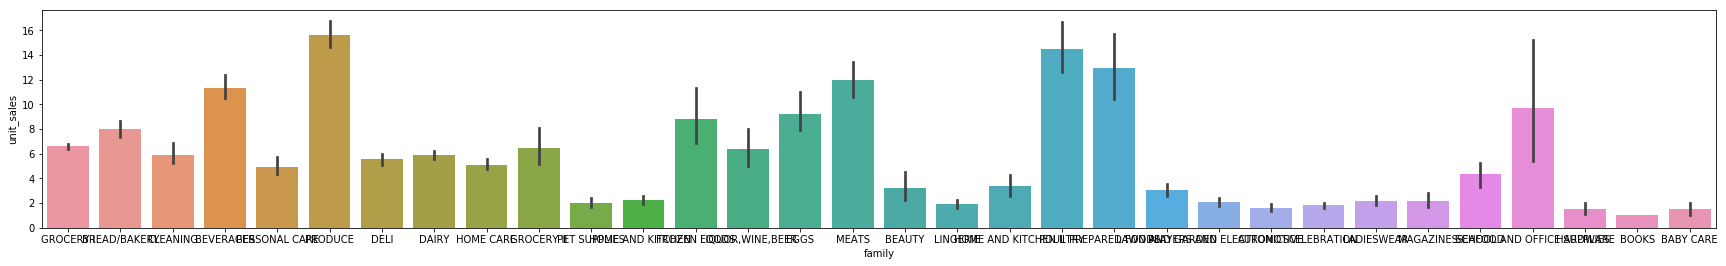

In [41]:
# Plotting Sales per Item Family
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.barplot(x='family', y='unit_sales', data=strain, ax=axis1)

# The graph shows maximum value for offices and poultry per item family.

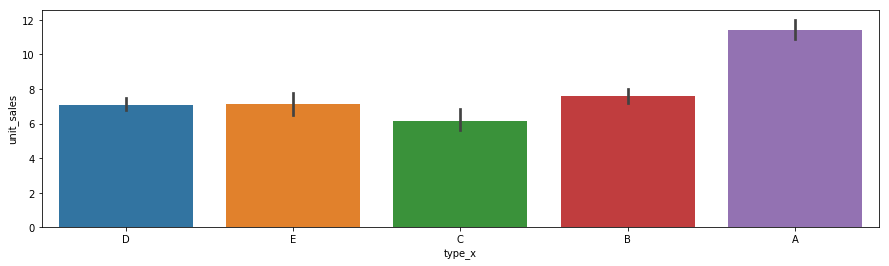

In [42]:
# Plotting Sales per Store Type
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.barplot(x='type_x', y='unit_sales', data=strain, ax=axis1)

# The store type A has maximum sales values.

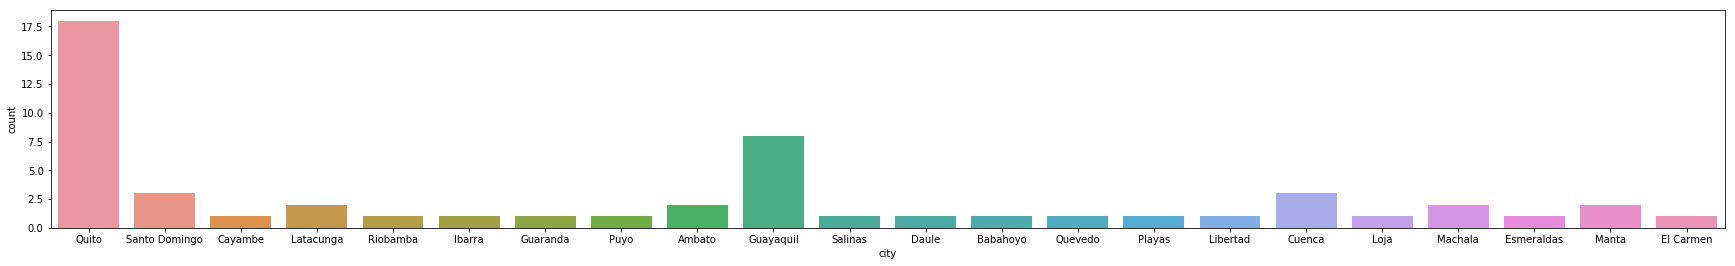

In [43]:
# Plotting Stores in Cities
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x=stores['city'], data=stores, ax=axis1)

# The city Quito has maximum number of stores.

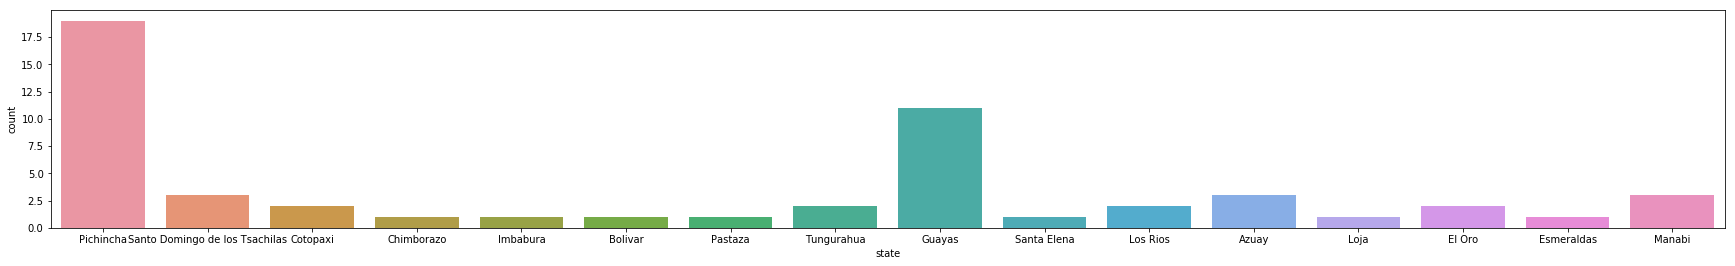

In [44]:
# Plotting Stores in States
fig, (axis1) = plt.subplots(1,1,figsize=(30,4))
sns.countplot(x=stores['state'], data=stores, ax=axis1)

# The state PichinchaSanto has maximum number of stores.

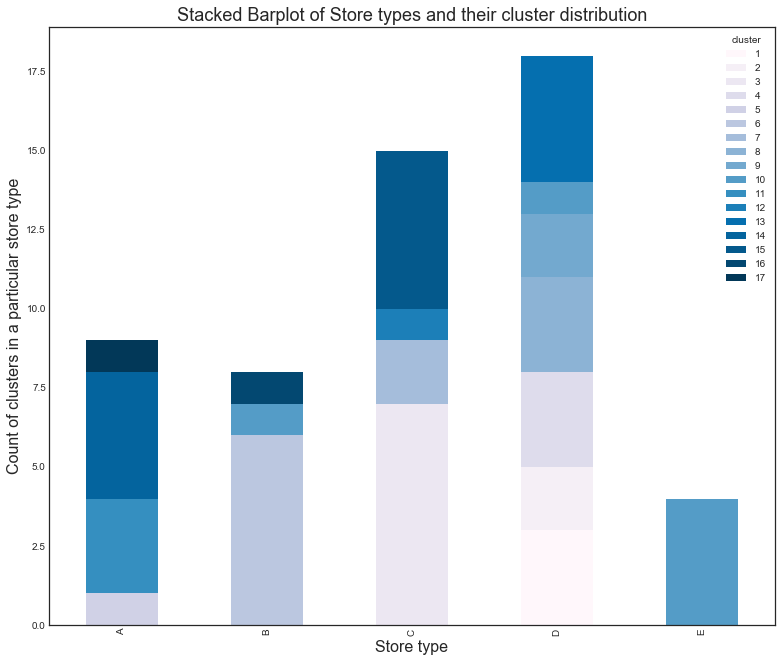

In [45]:
# The bar plot shows cluster distributions 
# Stacked Barplots of Types against clusters
plt.style.use('seaborn-white')
#plt.style.use('dark_background')
type_cluster = stores.groupby(['type','cluster']).size()
type_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types and their cluster distribution', fontsize=18)
plt.ylabel('Count of clusters in a particular store type', fontsize=16)
plt.xlabel('Store type', fontsize=16)
plt.show()

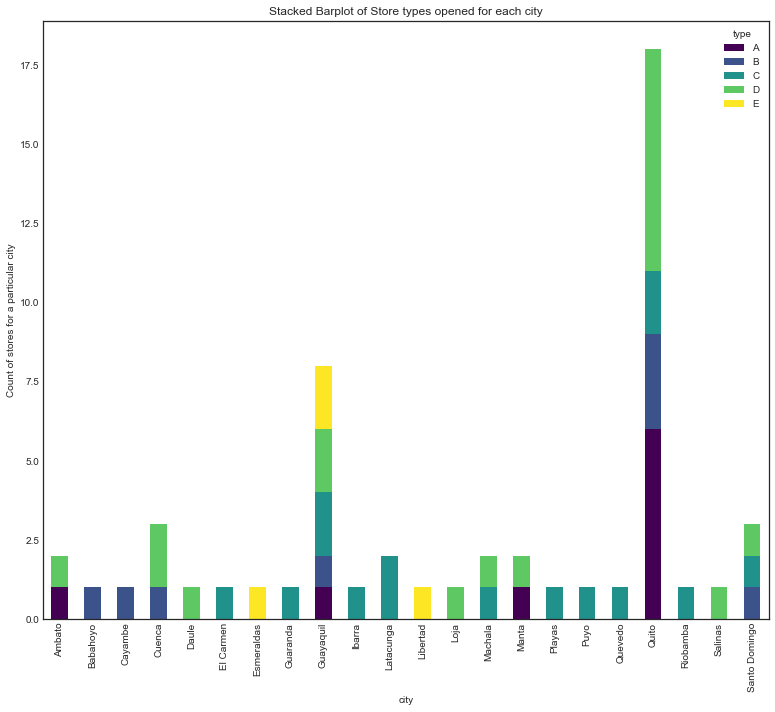

In [46]:
# Stacked barplot of types of stores across the different cities
plt.style.use('seaborn-white')
city_cluster = stores.groupby(['city','type']).store_nbr.size()
city_cluster.unstack().plot(kind='bar',stacked=True, colormap= 'viridis', figsize=(13,11),  grid=False)
plt.title('Stacked Barplot of Store types opened for each city')
plt.ylabel('Count of stores for a particular city')
plt.show()

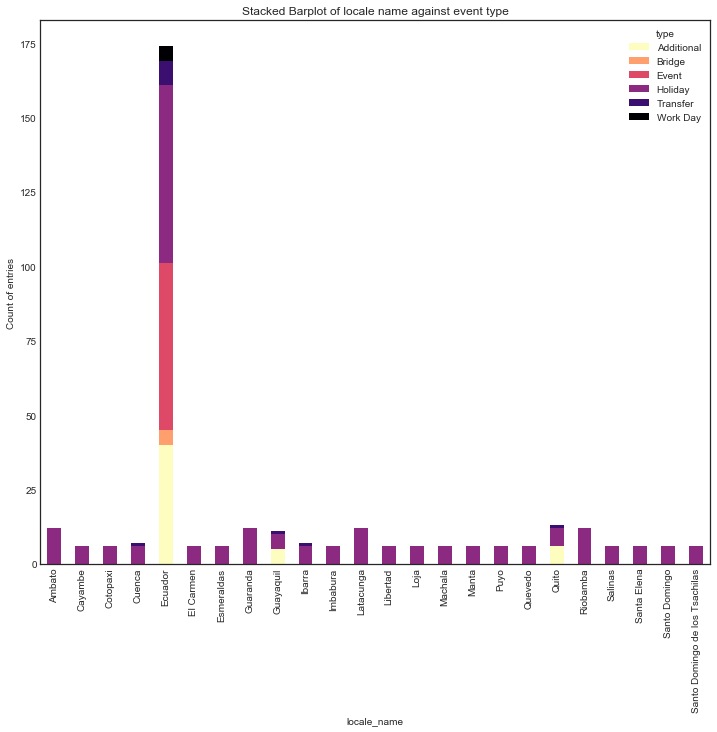

In [47]:
# Holiday Events data
plt.style.use('seaborn-white')
# plt.style.use('dark_background')
holiday_local_type = holidays.groupby(['locale_name', 'type']).size()
holiday_local_type.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False)
plt.title('Stacked Barplot of locale name against event type')
plt.ylabel('Count of entries')
plt.show()

# One hot encoding 

In [50]:
Salesdf.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,city,type_x,cluster,family,perishable,type_y,locale,transferred,dcoilwtico
0,2017-07-15,1,99197,2.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
1,2017-07-15,1,103520,1.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
2,2017-07-15,1,105574,6.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
3,2017-07-15,1,105575,10.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02
4,2017-07-15,1,105737,3.0,False,Quito,D,13,GROCERY I,0,NaN,NaN,NaN,46.02


In [54]:
## One hot encoding using get_dummies on pandas dataframe.
dummy_variables = ['onpromotion','city','type_x','cluster','store_nbr','item_nbr',
                'family','perishable','type_y', 'locale', 'transferred', 'month', 'day']

for var in dummy_variables:
    dummy = pd.get_dummies(Salesdf_filtered[var], prefix = var, drop_first = False)
    Salesdf_filtered = pd.concat([Salesdf_filtered, dummy], axis = 1)

Salesdf_filtered = Salesdf_filtered.drop(dummy_variables, axis = 1)
Salesdf_filtered = Salesdf_filtered.drop(['year'], axis = 1)

In [55]:
Salesdf_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34207 entries, 112 to 3359551
Columns: 285 entries, unit_sales to day_Wednesday
dtypes: float64(2), uint8(283)
memory usage: 10.0 MB


In [56]:
Salesdf_filtered.head()


,unit_sales,dcoilwtico,onpromotion_False,onpromotion_True,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,...,transferred_no_holyday,month_07,month_08,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
112,4.0,46.02,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
131,6.0,46.02,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
147,26.0,46.02,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
180,35.0,46.02,1,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
204,6.0,46.02,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [57]:
#Re-scale
#We keep this value to re-scale the predicted unit_sales values in the following lines of code.
min_train, max_train = Salesdf_filtered['unit_sales'].min(), Salesdf_filtered['unit_sales'].max()

In [58]:
scalable_variables = ['unit_sales','dcoilwtico']

for var in scalable_variables:
    mini, maxi = Salesdf_filtered[var].min(), Salesdf_filtered[var].max()
    Salesdf_filtered.loc[:,var] = (Salesdf_filtered[var] - mini) / (maxi - mini)

In [59]:
print('Shape : ', Salesdf_filtered.shape)
Salesdf_filtered.sample(10)

Shape :  (34207, 285)


,unit_sales,dcoilwtico,onpromotion_False,onpromotion_True,city_Ambato,city_Babahoyo,city_Cayambe,city_Cuenca,city_Daule,city_El Carmen,...,transferred_no_holyday,month_07,month_08,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
2641029,0.005753,0.860045,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2747974,0.059100,0.623025,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2344712,0.010983,0.821670,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2165994,0.006276,0.855530,1,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
832247,0.013598,0.048533,0,1,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
488362,0.005753,0.297968,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1363040,0.008368,0.889391,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1117379,0.004184,0.449210,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3267519,0.015690,0.404063,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2684494,0.004707,0.860045,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [60]:
Salesdf_filtered.isnull().sum()

unit_sales                0
dcoilwtico                0
onpromotion_False         0
onpromotion_True          0
city_Ambato               0
city_Babahoyo             0
city_Cayambe              0
city_Cuenca               0
city_Daule                0
city_El Carmen            0
city_Esmeraldas           0
city_Guaranda             0
city_Guayaquil            0
city_Ibarra               0
city_Latacunga            0
city_Libertad             0
city_Loja                 0
city_Machala              0
city_Manta                0
city_Playas               0
city_Puyo                 0
city_Quevedo              0
city_Quito                0
city_Riobamba             0
city_Salinas              0
city_Santo Domingo        0
type_x_A                  0
type_x_B                  0
type_x_C                  0
type_x_D                  0
                         ..
item_nbr_2010511          0
item_nbr_2042941          0
item_nbr_2042947          0
item_nbr_2081064          0
family_BEVERAGES    

In [61]:
#train database without unit_sales
Salesdf_filtered = Salesdf_filtered.reset_index(drop=True)  #we reset the index
y = Salesdf_filtered['unit_sales']
X = Salesdf_filtered.drop(['unit_sales'], axis = 1)

print('Shape X :', X.shape)
print('Shape y :', y.shape)

Shape X : (34207, 284)
Shape y : (34207,)


In [200]:
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_test shape :', X_test.shape)
print('y_test shape :', y_test.shape)

X_train shape : (27365, 284)
y_train shape : (27365,)
X_test shape : (6842, 284)
y_test shape : (6842,)


# LGBM

In [63]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(max_depth=5)
lgbm.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [64]:
y_pred=lgbm.predict(X_test)

In [66]:
print('R2 score using LGBM = ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using LGBM = ',mean_squared_error(y_test, y_pred), '/ 0.0')


R2 score using LGBM =  0.765161514568798 / 1.0
MSE score using LGBM =  0.0002177493063153235 / 0.0


In [67]:
Salesdf.corr()

,store_nbr,item_nbr,unit_sales,cluster,perishable,dcoilwtico
store_nbr,1.000000,0.008584,0.049419,0.035167,0.004841,0.000081
item_nbr,0.008584,1.000000,0.024456,0.001199,0.044806,0.000774
unit_sales,0.049419,0.024456,1.000000,0.017562,0.051758,0.003918
cluster,0.035167,0.001199,0.017562,1.000000,-0.004240,0.001593
perishable,0.004841,0.044806,0.051758,-0.004240,1.000000,-0.000611
dcoilwtico,0.000081,0.000774,0.003918,0.001593,-0.000611,1.000000


# Gradient Boosting Regressor

In [201]:
#gbr = GradientBoostingRegressor(loss='huber',learning_rate=0.3,n_estimators=100,max_depth=5,min_samples_split=3)
gbr=GradientBoostingRegressor()

parameters = {'n_estimators': [5,10],
              'loss':['huber'],
              'criterion': ['mse'],
              'max_depth': [5,10], 
              'min_samples_split': [2,5],
              'min_samples_leaf': [1,5]
             }

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold
grid_obj = GridSearchCV(gbr, parameters,
                        cv=5, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbr = grid_obj.best_estimator_

# Fit the best8 algorithm to the data. 
gbr.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.7min finished


GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [202]:
y_pred = gbr.predict(X_test)y_pred = RFR.predict(X_test)


print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

R2 score using Gradient Boosting=  0.44142224287834664 / 1.0
MSE score using Gradient Boosting=  0.0005179300952868811 / 0.0


In [ ]:
y_pred = RFR.predict(X_test)

print('R2 score using Gradient Boosting= ',r2_score(y_test, y_pred), '/ 1.0')
print('MSE score using Gradient Boosting= ',mean_squared_error(y_test, y_pred), '/ 0.0')

# XGBoost

In [185]:
df_train = pd.read_csv(
    'train.csv', usecols=[1, 2, 3, 4, 5],
    dtype={'onpromotion': bool},
    converters={'unit_sales': lambda u: np.log1p(
        float(u)) if float(u) > 0 else 0},
    parse_dates=["date"],
    skiprows=range(1, 66458909)  # 2016-01-01
)

In [186]:
df_test = pd.read_csv(
    "test.csv", usecols=[0, 1, 2, 3, 4],
    dtype={'onpromotion': bool},
    parse_dates=["date"]  # , date_parser=parser
).set_index(
    ['store_nbr', 'item_nbr', 'date']
)


In [187]:
items = pd.read_csv(
    "items.csv",
).set_index("item_nbr")

df_2017 = df_train.loc[df_train.date>=pd.datetime(2017,1,1)]
del df_train

In [188]:
promo_2017_train = df_2017.set_index(
    ["store_nbr", "item_nbr", "date"])[["onpromotion"]].unstack(
        level=-1).fillna(False)
promo_2017_train.columns = promo_2017_train.columns.get_level_values(1)
promo_2017_test = df_test[["onpromotion"]].unstack(level=-1).fillna(False)
promo_2017_test.columns = promo_2017_test.columns.get_level_values(1)
promo_2017_test = promo_2017_test.reindex(promo_2017_train.index).fillna(False)
promo_2017 = pd.concat([promo_2017_train, promo_2017_test], axis=1)
del promo_2017_test, promo_2017_train

In [189]:
df_2017 = df_2017.set_index(
    ["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(
        level=-1).fillna(0)
df_2017.columns = df_2017.columns.get_level_values(1)

In [195]:
items = items.reindex(df_2017.index.get_level_values(1))


In [196]:
def get_timespan(df, dt, minus, periods, freq='D'):
    return df[pd.date_range(dt - timedelta(days=minus), periods=periods, freq=freq)]

In [197]:
def prepare_dataset(t2017, is_train=True):
    X = pd.DataFrame({
        "day_1_2017": get_timespan(df_2017, t2017, 1, 1).values.ravel(),
        "mean_3_2017": get_timespan(df_2017, t2017, 3, 3).mean(axis=1).values,
        "mean_7_2017": get_timespan(df_2017, t2017, 7, 7).mean(axis=1).values,
        "mean_14_2017": get_timespan(df_2017, t2017, 14, 14).mean(axis=1).values,
        "mean_30_2017": get_timespan(df_2017, t2017, 30, 30).mean(axis=1).values,
        "mean_60_2017": get_timespan(df_2017, t2017, 60, 60).mean(axis=1).values,
        "mean_140_2017": get_timespan(df_2017, t2017, 140, 140).mean(axis=1).values,
        "promo_14_2017": get_timespan(promo_2017, t2017, 14, 14).sum(axis=1).values,
        "promo_60_2017": get_timespan(promo_2017, t2017, 60, 60).sum(axis=1).values,
        "promo_140_2017": get_timespan(promo_2017, t2017, 140, 140).sum(axis=1).values
    })

In [198]:
for i in range(7):
        X['mean_4_dow{}_2017'.format(i)] = get_timespan(df_2017, t2017, 28-i, 4, freq='7D').mean(axis=1).values
        X['mean_20_dow{}_2017'.format(i)] = get_timespan(df_2017, t2017, 140-i, 20, freq='7D').mean(axis=1).values
for i in range(16):
        X["promo_{}".format(i)] = promo_2017[
            t2017 + timedelta(days=i)].values.astype(np.uint8)
if is_train:
        y = df_2017[
            pd.date_range(t2017, periods=16)
        ].values
        return X, y
return X

ValueError: Length of values does not match length of index

In [ ]:
print("Preparing dataset...")
t2017 = date(2017, 5, 31)
X_l, y_l = [], []
for i in range(6):
    delta = timedelta(days=7 * i)
    X_tmp, y_tmp = prepare_dataset(
        t2017 + delta
    )
    X_l.append(X_tmp)
    y_l.append(y_tmp)
X_train = pd.concat(X_l, axis=0)
y_train = np.concatenate(y_l, axis=0)
del X_l, y_l
X_val, y_val = prepare_dataset(date(2017, 7, 26))
X_test = prepare_dataset(date(2017, 8, 16), is_train=False)

In [ ]:
print("Training and predicting models...")

param = {}
param['objective'] = 'reg:linear'
param['eta'] = 0.5
param['max_depth'] = 3
param['silent'] = 1
param['eval_metric'] = 'rmse'
param['min_child_weight'] = 5
param['subsample'] = 0.8
param['colsample_bytree'] = 0.7
param['seed'] = 137
num_rounds = 157

In [ ]:
plst = list(param.items())

In [ ]:
MAX_ROUNDS = 157
val_pred = []
test_pred = []
cate_vars = []

In [ ]:
dtest = xgb.DMatrix(X_test)
for i in range(16):
    print("=" * 50)
    print("Step %d" % (i+1))
    print("=" * 50)
    dtrain = xgb.DMatrix(
        X_train, label=y_train[:, i],
        weight=pd.concat([items["perishable"]] * 6) * 0.25 + 1
    )
    dval = xgb.DMatrix(
        X_val, label=y_val[:, i],
        weight=items["perishable"] * 0.25 + 1)

In [ ]:
watchlist = [ (dtrain,'train'), (dval, 'val') ]
    model = xgb.train(plst, dtrain, num_rounds, watchlist, early_stopping_rounds=50, verbose_eval=50)

In [ ]:
 val_pred.append(model.predict(dval))
    test_pred.append(model.predict(dtest))


In [ ]:
print("Validation mse:", mean_squared_error(
    y_val, np.array(val_pred).transpose()))

# Light GBM

In [206]:
df_train = pd.read_csv(
    'train.csv', usecols=[1, 2, 3, 4, 5],
    dtype={'onpromotion': bool},
    converters={'unit_sales': lambda u: np.log1p(
        float(u)) if float(u) > 0 else 0},
    parse_dates=["date"],
    skiprows=range(1, 66458909)  # 2016-01-01
)

In [207]:
df_train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2016-01-01,25,105574,2.564949,False
1,2016-01-01,25,105575,2.302585,False
2,2016-01-01,25,105857,1.386294,False
3,2016-01-01,25,108634,1.386294,False
4,2016-01-01,25,108701,1.098612,True


In [208]:
df_train.shape

(59038132, 5)

In [209]:
df_train.tail()

,date,store_nbr,item_nbr,unit_sales,onpromotion
59038127,2017-08-15,54,2089339,1.609438,False
59038128,2017-08-15,54,2106464,0.693147,True
59038129,2017-08-15,54,2110456,5.262690,False
59038130,2017-08-15,54,2113914,5.293305,True
59038131,2017-08-15,54,2116416,1.098612,False


In [210]:
df_test = pd.read_csv(
    "test.csv", usecols=[0, 1, 2, 3, 4],
    dtype={'onpromotion': bool},
    parse_dates=["date"]  # , date_parser=parser
).set_index(
    ['store_nbr', 'item_nbr', 'date']
)

In [211]:
#we want to predict unit sales for last 15 days of Aug 2017
df_test.head()

id  onpromotion
store_nbr item_nbr date                              
1         96995    2017-08-16  125497040        False
          99197    2017-08-16  125497041        False
          103501   2017-08-16  125497042        False
          103520   2017-08-16  125497043        False
          103665   2017-08-16  125497044        False

In [212]:
items = pd.read_csv(
    "items.csv",
).set_index("item_nbr")

In [213]:
items.shape

(4100, 3)

In [214]:
df_2017 = df_train[df_train.date.isin(
    pd.date_range("2017-05-31", periods=7 * 11))].copy()
del df_train
#dates range from May 31st to 15th Aug~ 77 days

In [215]:
df_2017.shape

(8125670, 5)

In [216]:
df_2017.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
50912462,2017-05-31,1,96995,0.693147,False
50912463,2017-05-31,1,99197,0.693147,False
50912464,2017-05-31,1,103520,1.386294,False
50912465,2017-05-31,1,103665,2.197225,False
50912466,2017-05-31,1,105574,1.386294,False


In [217]:
df_2017.isnull().sum()

date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64

In [218]:
promo_2017_train = df_2017.set_index(
    ["store_nbr", "item_nbr", "date"])[["onpromotion"]].unstack(
        level=-1).fillna(False)
#pivots the table and we want last level of index which is date in our case

In [219]:
promo_2017_train.head()

onpromotion                                              \
date                2017-05-31 2017-06-01 2017-06-02 2017-06-03 2017-06-04   
store_nbr item_nbr                                                           
1         96995          False      False      False      False      False   
          99197          False      False      False      False      False   
          103520         False      False      False      False      False   
          103665         False      False      False      False      False   
          105574         False      False      False      False      False   

                                                                           \
date               2017-06-05 2017-06-06 2017-06-07 2017-06-08 2017-06-09   
store_nbr item_nbr                                                          
1         96995         False      False      False      False      False   
          99197         False      False      False      False      False   
          103520        False      False      False      False      False   
          103665        False      False      False      False      False   
          105574        False      False      False      False      False   

                      ...                                                  \
date                  ...     2017-08-06 2017-08-07 2017-08-08 2017-08-09   
store_nbr item_nbr    ...                                                   
1         96995       ...          False      False      False      False   
          99197       ...          False      False      False      False   
          103520      ...          False      False      False      False   
          103665      ...          False      False      False      False   
          105574      ...          False      False      False      False   

                                                                           \
date               2017-08-10 2017-08-11 2017-08-12 2017-08-13 2017-08-14   
store_nbr item_nbr                                                          
1         96995         False      False      False      False      False   
          99197         False      False      False      False      False   
          103520        False      False      False      False      False   
          103665        False      False      False      False      False   
          105574        False      False      False      False      False   

                               
date               2017-08-15  
store_nbr item_nbr             
1         96995         False  
          99197         False  
          103520        False  
          103665        False  
          105574        False  

[5 rows x 77 columns]

In [220]:
promo_2017_train.columns = promo_2017_train.columns.get_level_values(1)

In [221]:
promo_2017_train.columns

DatetimeIndex(['2017-05-31', '2017-06-01', '2017-06-02', '2017-06-03',
               '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07',
               '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11',
               '2017-06-12', '2017-06-13', '2017-06-14', '2017-06-15',
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25', '2017-06-26', '2017-06-27',
               '2017-06-28', '2017-06-29', '2017-06-30', '2017-07-01',
               '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-07', '2017-07-08', '2017-07-09',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-15', '2017-07-16', '2017-07-17',
               '2017-07-18', '2017-07-19', '2017-07-20', '2017-07-21',
               '2017-07-22', '2017-07-23', '2017-07-24', '2017-07-25',
      

In [222]:
#Repeat same steps for test dataset
promo_2017_test = df_test[["onpromotion"]].unstack(level=-1).fillna(False)
promo_2017_test.columns = promo_2017_test.columns.get_level_values(1)

In [223]:
promo_2017_test.shape

(210654, 16)

In [224]:
promo_2017_test.head()

date                2017-08-16  2017-08-17  2017-08-18  2017-08-19  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103501         False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   

date                2017-08-20  2017-08-21  2017-08-22  2017-08-23  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103501         False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   

date                2017-08-24  2017-08-25  2017-08-26  2017-08-27  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103501         False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   

date                2017-08-28  2017-08-29  2017-08-30  2017-08-31  
store_nbr item_nbr                                                  
1         96995          False       False       False       False  
          99197          False       False       False       False  
          103501         False       False       False       False  
          103520         False       False       False       False  
          103665         False       False       False       False

In [225]:
promo_2017_test = promo_2017_test.reindex(promo_2017_train.index).fillna(False)
#Reseting the index same as promo_2017_train
promo_2017 = pd.concat([promo_2017_train, promo_2017_test], axis=1)

In [226]:
del promo_2017_test,promo_2017_train

In [227]:
df_2017 = df_2017.set_index(
    ["store_nbr", "item_nbr", "date"])[["unit_sales"]].unstack(
        level=-1).fillna(0)
df_2017.columns = df_2017.columns.get_level_values(1)

In [228]:
promo_2017.head()

date                2017-05-31  2017-06-01  2017-06-02  2017-06-03  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-06-04  2017-06-05  2017-06-06  2017-06-07  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-06-08  2017-06-09     ...      2017-08-22  \
store_nbr item_nbr                             ...                   
1         96995          False       False     ...           False   
          99197          False       False     ...           False   
          103520         False       False     ...           False   
          103665         False       False     ...           False   
          105574         False       False     ...           False   

date                2017-08-23  2017-08-24  2017-08-25  2017-08-26  \
store_nbr item_nbr                                                   
1         96995          False       False       False       False   
          99197          False       False       False       False   
          103520         False       False       False       False   
          103665         False       False       False       False   
          105574         False       False       False       False   

date                2017-08-27  2017-08-28  2017-08-29  2017-08-30  2017-08-31  
store_nbr item_nbr                                                              
1         96995          False       False       False       False       False  
          99197          False       False       False       False       False  
          103520         False       False       False       False       False  
          103665         False       False       False       False       False  
          105574         False       False       False       False       False  

[5 rows x 93 columns]

In [229]:
items = items.reindex(df_2017.index.get_level_values(1))

In [230]:
items.head()

,family,class,perishable
item_nbr,,,
96995,GROCERY I,1093,0
99197,GROCERY I,1067,0
103520,GROCERY I,1028,0
103665,BREAD/BAKERY,2712,1
105574,GROCERY I,1045,0


In [231]:
def get_timespan(df, dt, minus, periods):
    return df[
        pd.date_range(dt - timedelta(days=minus), periods=periods)
    ]

In [232]:
def prepare_dataset(t2017, is_train=True):
    X = pd.DataFrame({
        "mean_3_2017": get_timespan(df_2017, t2017, 3, 3).mean(axis=1).values,
        "mean_7_2017": get_timespan(df_2017, t2017, 7, 7).mean(axis=1).values,
        "mean_14_2017": get_timespan(df_2017, t2017, 14, 14).mean(axis=1).values,
        "promo_14_2017": get_timespan(promo_2017, t2017, 14, 14).sum(axis=1).values
    })
    for i in range(16):
        X["promo_{}".format(i)] = promo_2017[
            t2017 + timedelta(days=i)].values.astype(np.uint8)
    if is_train:
        y = df_2017[
            pd.date_range(t2017, periods=16)
        ].values
        return X, y
    return X

In [233]:
print("Preparing dataset...")
t2017 = date(2017, 6, 21)
X_l, y_l = [], []
for i in range(4):
    delta = timedelta(days=7 * i)
    X_tmp, y_tmp = prepare_dataset(
        t2017 + delta
    )
    X_l.append(X_tmp)
    y_l.append(y_tmp)
X_train = pd.concat(X_l, axis=0)
y_train = np.concatenate(y_l, axis=0)
del X_l, y_l
X_val, y_val = prepare_dataset(date(2017, 7, 26))
X_test = prepare_dataset(date(2017, 8, 16), is_train=False)

Preparing dataset...


In [234]:
print("Training and predicting models...")
params = {
    'num_leaves': 2**5 - 1,
    'objective': 'regression_l2',
    'max_depth': 8,
    'min_data_in_leaf': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.75,
    'bagging_freq': 1,
    'metric': 'l2',
    'num_threads': 4
}

Training and predicting models...


In [235]:
MAX_ROUNDS = 1000
val_pred = []
test_pred = []
cate_vars = []

In [236]:
for i in range(16):
    print("=" * 50)
    print("Step %d" % (i+1))
    print("=" * 50)
    dtrain = lgb.Dataset(
        X_train, label=y_train[:, i],
        categorical_feature=cate_vars,
        weight=pd.concat([items["perishable"]] * 4) * 0.25 + 1
    )
    dval = lgb.Dataset(
        X_val, label=y_val[:, i], reference=dtrain,
        weight=items["perishable"] * 0.25 + 1,
        categorical_feature=cate_vars)
    bst = lgb.train(
        params, dtrain, num_boost_round=MAX_ROUNDS,
        valid_sets=[dtrain, dval], early_stopping_rounds=50, verbose_eval=50
    )
    print("\n".join(("%s: %.2f" % x) for x in sorted(
        zip(X_train.columns, bst.feature_importance("gain")),
        key=lambda x: x[1], reverse=True
    )))
    val_pred.append(bst.predict(
        X_val, num_iteration=bst.best_iteration or MAX_ROUNDS))
    test_pred.append(bst.predict(
        X_test, num_iteration=bst.best_iteration or MAX_ROUNDS))

Step 1


C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.345426	valid_1's l2: 0.341575
[100]	training's l2: 0.333255	valid_1's l2: 0.330053
[150]	training's l2: 0.331273	valid_1's l2: 0.328793
[200]	training's l2: 0.330242	valid_1's l2: 0.328404
[250]	training's l2: 0.329451	valid_1's l2: 0.327957
[300]	training's l2: 0.328762	valid_1's l2: 0.327707
[350]	training's l2: 0.328174	valid_1's l2: 0.327541
[400]	training's l2: 0.327652	valid_1's l2: 0.327391
[450]	training's l2: 0.327167	valid_1's l2: 0.327343
[500]	training's l2: 0.326675	valid_1's l2: 0.327258
[550]	training's l2: 0.326243	valid_1's l2: 0.32723
[600]	training's l2: 0.325814	valid_1's l2: 0.327186
[650]	training's l2: 0.325406	valid_1's l2: 0.327156
[700]	training's l2: 0.325008	valid_1's l2: 0.327132
[750]	training's l2: 0.324674	valid_1's l2: 0.327117
[800]	training's l2: 0.324326	valid_1's l2: 0.327106
[850]	training's l2: 0.323984	valid_1's l2: 0.327098
[900]	training's l2: 0.323651	valid_1's

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.361789	valid_1's l2: 0.373597
[100]	training's l2: 0.352623	valid_1's l2: 0.363492
[150]	training's l2: 0.350602	valid_1's l2: 0.36178
[200]	training's l2: 0.349521	valid_1's l2: 0.361047
[250]	training's l2: 0.348595	valid_1's l2: 0.36063
[300]	training's l2: 0.347892	valid_1's l2: 0.360238
[350]	training's l2: 0.347222	valid_1's l2: 0.360041
[400]	training's l2: 0.346618	valid_1's l2: 0.359841
[450]	training's l2: 0.346083	valid_1's l2: 0.359865
Early stopping, best iteration is:
[428]	training's l2: 0.346307	valid_1's l2: 0.359802
mean_14_2017: 1740572.35
mean_7_2017: 1288913.02
promo_1: 98887.71
mean_3_2017: 72128.15
promo_14_2017: 44918.28
promo_3: 12553.51
promo_0: 6772.75
promo_2: 6685.14
promo_4: 5190.13
promo_5: 4377.33
promo_6: 1988.98
promo_7: 1944.19
promo_9: 1654.87
promo_8: 1446.43
promo_14: 1397.49
promo_15: 950.80
promo_13: 796.13
promo_11: 708.95
promo_12: 611.95
promo_10: 526.87
Step 3

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.380238	valid_1's l2: 0.401839
[100]	training's l2: 0.367238	valid_1's l2: 0.389945
[150]	training's l2: 0.36443	valid_1's l2: 0.388902
[200]	training's l2: 0.362959	valid_1's l2: 0.388285
[250]	training's l2: 0.361882	valid_1's l2: 0.38783
[300]	training's l2: 0.360956	valid_1's l2: 0.387794
[350]	training's l2: 0.360228	valid_1's l2: 0.387578
[400]	training's l2: 0.359561	valid_1's l2: 0.387468
[450]	training's l2: 0.358974	valid_1's l2: 0.387272
[500]	training's l2: 0.358396	valid_1's l2: 0.387158
[550]	training's l2: 0.357873	valid_1's l2: 0.387093
[600]	training's l2: 0.357404	valid_1's l2: 0.387032
[650]	training's l2: 0.356923	valid_1's l2: 0.386917
[700]	training's l2: 0.356476	valid_1's l2: 0.386828
[750]	training's l2: 0.356088	valid_1's l2: 0.386823
Early stopping, best iteration is:
[722]	training's l2: 0.356297	valid_1's l2: 0.386805
mean_14_2017: 2276112.09
mean_7_2017: 1211568.64
promo_2: 

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.410471	valid_1's l2: 0.414196
[100]	training's l2: 0.398307	valid_1's l2: 0.402892
[150]	training's l2: 0.395294	valid_1's l2: 0.401006
[200]	training's l2: 0.393762	valid_1's l2: 0.400177
[250]	training's l2: 0.392596	valid_1's l2: 0.399714
[300]	training's l2: 0.391677	valid_1's l2: 0.399336
[350]	training's l2: 0.39093	valid_1's l2: 0.399122
[400]	training's l2: 0.390194	valid_1's l2: 0.398933
[450]	training's l2: 0.389548	valid_1's l2: 0.398641
[500]	training's l2: 0.388919	valid_1's l2: 0.398452
[550]	training's l2: 0.388372	valid_1's l2: 0.398388
[600]	training's l2: 0.387831	valid_1's l2: 0.398288
[650]	training's l2: 0.387336	valid_1's l2: 0.398154
[700]	training's l2: 0.386861	valid_1's l2: 0.398123
Early stopping, best iteration is:
[685]	training's l2: 0.386993	valid_1's l2: 0.398111
mean_14_2017: 2974465.95
mean_7_2017: 1054189.64
mean_3_2017: 89433.90
promo_3: 84138.16
promo_14_2017: 48004.

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.439608	valid_1's l2: 0.437589
[100]	training's l2: 0.425802	valid_1's l2: 0.424923
[150]	training's l2: 0.422442	valid_1's l2: 0.422349
[200]	training's l2: 0.420531	valid_1's l2: 0.421144
[250]	training's l2: 0.419291	valid_1's l2: 0.420399
[300]	training's l2: 0.418233	valid_1's l2: 0.41975
[350]	training's l2: 0.417339	valid_1's l2: 0.419507
[400]	training's l2: 0.416577	valid_1's l2: 0.419157
[450]	training's l2: 0.415888	valid_1's l2: 0.418962
[500]	training's l2: 0.415232	valid_1's l2: 0.418816
[550]	training's l2: 0.414648	valid_1's l2: 0.41868
[600]	training's l2: 0.41409	valid_1's l2: 0.418486
[650]	training's l2: 0.413584	valid_1's l2: 0.4184
[700]	training's l2: 0.413089	valid_1's l2: 0.418366
[750]	training's l2: 0.412624	valid_1's l2: 0.418238
[800]	training's l2: 0.412152	valid_1's l2: 0.418231
[850]	training's l2: 0.411689	valid_1's l2: 0.418182
[900]	training's l2: 0.41125	valid_1's l2: 

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.409423	valid_1's l2: 0.423732
[100]	training's l2: 0.398253	valid_1's l2: 0.410143
[150]	training's l2: 0.395289	valid_1's l2: 0.407632
[200]	training's l2: 0.393823	valid_1's l2: 0.40672
[250]	training's l2: 0.392693	valid_1's l2: 0.40629
[300]	training's l2: 0.391747	valid_1's l2: 0.405981
[350]	training's l2: 0.391015	valid_1's l2: 0.405789
[400]	training's l2: 0.390353	valid_1's l2: 0.405637
[450]	training's l2: 0.389738	valid_1's l2: 0.405466
[500]	training's l2: 0.389119	valid_1's l2: 0.405442
[550]	training's l2: 0.388501	valid_1's l2: 0.405391
[600]	training's l2: 0.387996	valid_1's l2: 0.405338
[650]	training's l2: 0.387474	valid_1's l2: 0.405242
[700]	training's l2: 0.387008	valid_1's l2: 0.405259
[750]	training's l2: 0.386578	valid_1's l2: 0.405199
[800]	training's l2: 0.386126	valid_1's l2: 0.405183
[850]	training's l2: 0.3857	valid_1's l2: 0.405155
Early stopping, best iteration is:
[818]	t

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.399018	valid_1's l2: 0.49924
[100]	training's l2: 0.387336	valid_1's l2: 0.484638
[150]	training's l2: 0.384435	valid_1's l2: 0.484011
[200]	training's l2: 0.382865	valid_1's l2: 0.483388
[250]	training's l2: 0.381723	valid_1's l2: 0.482989
Early stopping, best iteration is:
[247]	training's l2: 0.38178	valid_1's l2: 0.482893
mean_14_2017: 2392340.97
mean_7_2017: 653001.30
mean_3_2017: 227263.77
promo_6: 154687.27
promo_14_2017: 50852.26
promo_3: 13836.84
promo_7: 9821.14
promo_13: 9454.59
promo_5: 7879.10
promo_0: 5090.57
promo_1: 4508.53
promo_4: 4490.62
promo_9: 3747.82
promo_2: 3247.38
promo_14: 3068.47
promo_8: 2151.46
promo_15: 1418.15
promo_11: 1223.04
promo_10: 1091.72
promo_12: 1042.56
Step 8


C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.387481	valid_1's l2: 0.459816
[100]	training's l2: 0.375394	valid_1's l2: 0.442189
[150]	training's l2: 0.372745	valid_1's l2: 0.439249
[200]	training's l2: 0.371393	valid_1's l2: 0.438288
[250]	training's l2: 0.370229	valid_1's l2: 0.43787
[300]	training's l2: 0.369299	valid_1's l2: 0.437383
[350]	training's l2: 0.368511	valid_1's l2: 0.437127
[400]	training's l2: 0.367846	valid_1's l2: 0.43692
Early stopping, best iteration is:
[387]	training's l2: 0.368018	valid_1's l2: 0.436873
mean_14_2017: 2573494.50
mean_7_2017: 792797.99
promo_7: 197611.39
mean_3_2017: 66353.60
promo_14_2017: 41762.19
promo_0: 40190.66
promo_14: 23317.61
promo_5: 8148.69
promo_3: 6459.85
promo_9: 6265.38
promo_8: 5462.40
promo_6: 5018.13
promo_2: 3198.57
promo_1: 3040.08
promo_4: 2875.42
promo_15: 2804.16
promo_10: 2286.20
promo_13: 1833.45
promo_11: 1238.95
promo_12: 803.11
Step 9


C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.394435	valid_1's l2: 0.43888
[100]	training's l2: 0.384307	valid_1's l2: 0.426594
[150]	training's l2: 0.381573	valid_1's l2: 0.425365
[200]	training's l2: 0.380165	valid_1's l2: 0.424915
[250]	training's l2: 0.379102	valid_1's l2: 0.42464
[300]	training's l2: 0.378258	valid_1's l2: 0.424621
Early stopping, best iteration is:
[268]	training's l2: 0.378777	valid_1's l2: 0.424542
mean_14_2017: 2315444.86
mean_7_2017: 576773.86
promo_8: 132934.71
mean_3_2017: 56837.38
promo_14_2017: 49918.47
promo_10: 15948.77
promo_7: 8183.04
promo_9: 8000.33
promo_3: 5774.89
promo_11: 4581.83
promo_12: 4448.17
promo_13: 3887.49
promo_0: 3679.49
promo_5: 3582.17
promo_14: 2829.91
promo_15: 2630.20
promo_2: 2189.40
promo_1: 2186.88
promo_6: 1898.80
promo_4: 1585.22
Step 10


C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.410335	valid_1's l2: 0.441569
[100]	training's l2: 0.397481	valid_1's l2: 0.428804
[150]	training's l2: 0.394016	valid_1's l2: 0.42741
[200]	training's l2: 0.392388	valid_1's l2: 0.427148
[250]	training's l2: 0.391117	valid_1's l2: 0.426952
[300]	training's l2: 0.390147	valid_1's l2: 0.42679
[350]	training's l2: 0.389321	valid_1's l2: 0.426679
[400]	training's l2: 0.388502	valid_1's l2: 0.426545
[450]	training's l2: 0.387782	valid_1's l2: 0.426572
Early stopping, best iteration is:
[443]	training's l2: 0.387879	valid_1's l2: 0.42652
mean_14_2017: 2557795.17
mean_7_2017: 735950.47
promo_9: 182055.74
mean_3_2017: 69744.17
promo_14_2017: 66991.75
promo_2: 20845.74
promo_10: 11925.94
promo_7: 9546.93
promo_14: 6335.52
promo_8: 6035.00
promo_12: 5079.00
promo_11: 4546.43
promo_0: 3050.29
promo_13: 2641.09
promo_6: 2530.66
promo_1: 2313.73
promo_15: 1810.47
promo_4: 1638.73
promo_5: 1478.13
promo_3: 1237.81
S

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.445982	valid_1's l2: 0.448663
[100]	training's l2: 0.433734	valid_1's l2: 0.43912
[150]	training's l2: 0.430007	valid_1's l2: 0.438135
[200]	training's l2: 0.428178	valid_1's l2: 0.438067
[250]	training's l2: 0.426906	valid_1's l2: 0.438096
Early stopping, best iteration is:
[217]	training's l2: 0.427708	valid_1's l2: 0.438013
mean_14_2017: 2886886.81
mean_7_2017: 866785.62
promo_10: 117391.85
mean_3_2017: 70169.86
promo_14_2017: 51089.29
promo_9: 14678.29
promo_12: 11262.62
promo_11: 9786.72
promo_14: 9359.32
promo_7: 8957.83
promo_8: 7779.25
promo_3: 5064.93
promo_15: 4388.51
promo_13: 4354.16
promo_6: 2461.97
promo_2: 2452.43
promo_0: 2413.86
promo_1: 2247.33
promo_5: 2101.79
promo_4: 1715.46
Step 12


C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.473688	valid_1's l2: 0.477994
[100]	training's l2: 0.459767	valid_1's l2: 0.467216
[150]	training's l2: 0.455895	valid_1's l2: 0.465668
[200]	training's l2: 0.453973	valid_1's l2: 0.464934
[250]	training's l2: 0.452419	valid_1's l2: 0.464751
[300]	training's l2: 0.451348	valid_1's l2: 0.464492
[350]	training's l2: 0.450415	valid_1's l2: 0.464335
[400]	training's l2: 0.449497	valid_1's l2: 0.464275
[450]	training's l2: 0.448759	valid_1's l2: 0.464089
[500]	training's l2: 0.448015	valid_1's l2: 0.46405
[550]	training's l2: 0.447382	valid_1's l2: 0.463976
[600]	training's l2: 0.44673	valid_1's l2: 0.463993
Early stopping, best iteration is:
[552]	training's l2: 0.447361	valid_1's l2: 0.463971
mean_14_2017: 3200469.58
mean_7_2017: 577953.54
mean_3_2017: 333469.72
promo_11: 122831.87
promo_14_2017: 52893.48
promo_14: 13053.00
promo_10: 12652.97
promo_12: 11488.35
promo_9: 11377.84
promo_4: 10132.59
promo_13:

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.439442	valid_1's l2: 0.44179
[100]	training's l2: 0.427395	valid_1's l2: 0.431443
[150]	training's l2: 0.424046	valid_1's l2: 0.430303
[200]	training's l2: 0.422342	valid_1's l2: 0.429721
[250]	training's l2: 0.421068	valid_1's l2: 0.429396
[300]	training's l2: 0.420096	valid_1's l2: 0.429261
[350]	training's l2: 0.419191	valid_1's l2: 0.429207
[400]	training's l2: 0.418414	valid_1's l2: 0.429185
Early stopping, best iteration is:
[391]	training's l2: 0.418549	valid_1's l2: 0.429136
mean_14_2017: 2632445.46
mean_7_2017: 521313.66
mean_3_2017: 267615.91
promo_12: 108427.40
promo_14_2017: 48025.23
promo_13: 28659.43
promo_10: 13509.07
promo_14: 11831.36
promo_9: 8788.49
promo_5: 6217.31
promo_15: 5781.79
promo_7: 5723.87
promo_11: 5335.58
promo_8: 4108.28
promo_0: 2860.24
promo_6: 2566.64
promo_3: 1944.15
promo_2: 1881.42
promo_4: 1778.30
promo_1: 1474.91
Step 14


C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.424511	valid_1's l2: 0.424237
[100]	training's l2: 0.412256	valid_1's l2: 0.414926
[150]	training's l2: 0.40883	valid_1's l2: 0.414076
[200]	training's l2: 0.407278	valid_1's l2: 0.413841
[250]	training's l2: 0.406106	valid_1's l2: 0.413591
[300]	training's l2: 0.405213	valid_1's l2: 0.413611
Early stopping, best iteration is:
[263]	training's l2: 0.40585	valid_1's l2: 0.413529
mean_14_2017: 2414484.63
mean_7_2017: 524556.30
mean_3_2017: 193337.92
promo_13: 188506.26
promo_14_2017: 48890.64
promo_12: 16375.68
promo_14: 13808.70
promo_6: 13199.29
promo_10: 10438.53
promo_7: 5985.51
promo_9: 5935.19
promo_0: 5345.03
promo_11: 4078.74
promo_8: 3997.04
promo_15: 3660.84
promo_2: 2011.96
promo_1: 1613.82
promo_4: 1335.69
promo_5: 1301.59
promo_3: 920.14
Step 15


C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.410404	valid_1's l2: 0.409743
[100]	training's l2: 0.396845	valid_1's l2: 0.398428
[150]	training's l2: 0.394279	valid_1's l2: 0.397774
[200]	training's l2: 0.392721	valid_1's l2: 0.397519
[250]	training's l2: 0.39158	valid_1's l2: 0.397234
[300]	training's l2: 0.390648	valid_1's l2: 0.397021
[350]	training's l2: 0.389827	valid_1's l2: 0.396762
[400]	training's l2: 0.389134	valid_1's l2: 0.396682
[450]	training's l2: 0.388494	valid_1's l2: 0.396654
[500]	training's l2: 0.387891	valid_1's l2: 0.396593
[550]	training's l2: 0.387325	valid_1's l2: 0.396566
Early stopping, best iteration is:
[525]	training's l2: 0.387607	valid_1's l2: 0.396533
mean_14_2017: 2623229.79
mean_7_2017: 582393.42
promo_14: 234589.69
mean_3_2017: 64865.24
promo_14_2017: 51031.58
promo_7: 30271.16
promo_0: 29809.61
promo_15: 19597.47
promo_13: 11752.56
promo_9: 9745.43
promo_12: 8965.86
promo_10: 6252.71
promo_2: 4551.82
promo_6: 38

C:\Users\owner\Anaconda3\lib\site-packages\lightgbm\basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


Training until validation scores don't improve for 50 rounds.
[50]	training's l2: 0.418688	valid_1's l2: 0.431309
[100]	training's l2: 0.408303	valid_1's l2: 0.423437
[150]	training's l2: 0.405377	valid_1's l2: 0.422546
[200]	training's l2: 0.403768	valid_1's l2: 0.422129
[250]	training's l2: 0.402628	valid_1's l2: 0.421738
[300]	training's l2: 0.401627	valid_1's l2: 0.421705
[350]	training's l2: 0.400813	valid_1's l2: 0.421591
[400]	training's l2: 0.400032	valid_1's l2: 0.421575
Early stopping, best iteration is:
[353]	training's l2: 0.400759	valid_1's l2: 0.421559
mean_14_2017: 2379286.83
mean_7_2017: 394530.19
promo_15: 183094.34
mean_3_2017: 56035.57
promo_14_2017: 50660.26
promo_14: 9734.78
promo_7: 5108.38
promo_10: 4548.12
promo_0: 4367.32
promo_9: 4153.17
promo_13: 4085.99
promo_12: 3872.12
promo_8: 2957.46
promo_11: 2539.77
promo_2: 2260.85
promo_1: 1961.19
promo_6: 1878.29
promo_4: 1629.73
promo_3: 1456.65
promo_5: 1215.81


In [237]:
print("Validation mse:", mean_squared_error(
    y_val, np.array(val_pred).transpose()))

Validation mse: 0.4139611435248317


In [238]:
print("Making submission...")
y_test = np.array(test_pred).transpose()
df_preds = pd.DataFrame(
    y_test, index=df_2017.index,
    columns=pd.date_range("2017-08-16", periods=16)
).stack().to_frame("unit_sales")
df_preds.index.set_names(["store_nbr","item_nbr","date"], inplace=True)

Making submission...


In [239]:
submission = df_test[["id"]].join(df_preds, how="left").fillna(0)

In [240]:
submission["unit_sales"] = np.clip(np.expm1(submission["unit_sales"]), 0, 1000)
submission.to_csv('lgb.csv', float_format='%.4f', index=None)

# Conclusion

We are getting the following results   
- LGBM       
R2 Score:0.76
- Gradient Boosting Regressor   
R2 Score:0.44       

LGBM gave a better score.


# Citations

[1] https://www.kaggle.com/c/favorita-grocery-sales-forecasting/data

[2] https://en.wikipedia.org/wiki/Xgboost

[3] https://en.wikipedia.org/wiki/Random_forest

[4] https://en.wikipedia.org/wiki/Decision_tree

[5]https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vsxgboost/

[6] https://www.tutorialspoint.com/sales_forecasting/sales_forecasting_discussion.html

# License

Copyright 2019  **Apurva Nivargi**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.